In [1]:
from sklearn.svm import SVC
from helper.const import image_dir, gt_dir, test_dir
from helper.autoencoder_helper import extract_features_encoder
from helper.loading import load_all_images_in_folder, load_images_and_groundtruth, split_data
from helper.neural_net import *
from helper.visualisations import *
from models.autoencoder import Encoder, Decoder
from models.features_extraction import *

%load_ext autoreload
%autoreload 2

# Autoencoder training

Here we train the autoencoder, using the MSE loss. We also use a weight decay to try to mitigate overfitting. We use the Adam optimizer, with batch size 250 (we can take a large batch size since the inputs are only small patches).

In [2]:
# Train the autoencoder and save the weights
train_losses, test_losses, _ = run_experiment('autoencoder', 'mse', 'adam', image_dir, test_dir, num_epochs=100,
               learning_rate=1e-4, im_patch='patches', lr_scheduler=True, lr_schedule=(80, 0.1), batch_size=250, pos_weight=False, weight_decay=1e-4)

Number of parameters in the model 9459155
Cuda memory for the model 38756352
Starting training


100%|██████████| 250/250 [01:34<00:00,  2.65it/s]


Epoch 0 | Avg test loss: 0.03611


100%|██████████| 250/250 [01:15<00:00,  3.30it/s]


Epoch 1 | Avg test loss: 0.03601


100%|██████████| 250/250 [01:15<00:00,  3.31it/s]


Epoch 2 | Avg test loss: 0.03596


100%|██████████| 250/250 [01:14<00:00,  3.35it/s]


Epoch 3 | Avg test loss: 0.03594


100%|██████████| 250/250 [01:14<00:00,  3.35it/s]


Epoch 4 | Avg test loss: 0.03594


100%|██████████| 250/250 [01:14<00:00,  3.35it/s]


Epoch 5 | Avg test loss: 0.03592


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 6 | Avg test loss: 0.03591


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 7 | Avg test loss: 0.03592


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 8 | Avg test loss: 0.03591


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 9 | Avg test loss: 0.03592


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 10 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 11 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 12 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 13 | Avg test loss: 0.03591


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 14 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 15 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 16 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 17 | Avg test loss: 0.03593


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 18 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 19 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 20 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 21 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 22 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 23 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 24 | Avg test loss: 0.03593


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 25 | Avg test loss: 0.03591


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 26 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 27 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 28 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 29 | Avg test loss: 0.03596


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 30 | Avg test loss: 0.03592


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 31 | Avg test loss: 0.03591


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 32 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 33 | Avg test loss: 0.03591


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 34 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 35 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 36 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 37 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 38 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 39 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 40 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 41 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 42 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 43 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 44 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 45 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 46 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 47 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 48 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 49 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 50 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 51 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 52 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 53 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 54 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 55 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 56 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 57 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 58 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 59 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 60 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 61 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 62 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 63 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 64 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 65 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 66 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 67 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 68 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 69 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 70 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 71 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 72 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 73 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 74 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 75 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 76 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 77 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 78 | Avg test loss: 0.03590


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 79 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 80 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 81 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 82 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 83 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 84 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 85 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 86 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 87 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 88 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 89 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 90 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 91 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 92 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 93 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 94 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 95 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 96 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 97 | Avg test loss: 0.03589


100%|██████████| 250/250 [01:11<00:00,  3.50it/s]


Epoch 98 | Avg test loss: 0.03588


100%|██████████| 250/250 [01:11<00:00,  3.49it/s]


Epoch 99 | Avg test loss: 0.03589
End of training


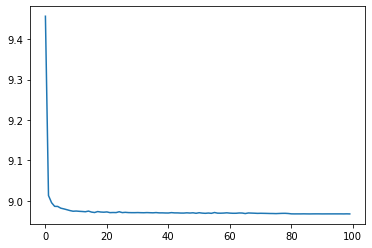

In [3]:
plt.plot(train_losses)
plt.show()

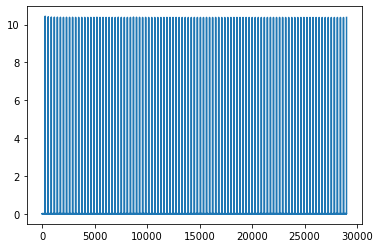

In [4]:
plt.plot(test_losses)
plt.show()

## Compare the true and reconstructed images

Let's see how well the autoencoder reconstruct a given patch.

In [16]:
# Load the trained autoencoder
encoder_path = 'encoder_2021-12-20_19-46-37'
decoder_path = 'decoder_2021-12-20_19-46-37'

encoder = Encoder()
load_model_weights(encoder, weights_folder + "autoencoder/" + encoder_path + ".pth")

decoder = Decoder()
load_model_weights(decoder, weights_folder + "autoencoder/" + decoder_path + ".pth")

autoencoder = AutoEncoder(encoder, decoder)
autoencoder.eval()

AutoEncoder(
  (encoder): Encoder(
    (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (conv7): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (fc): Linear(in_features=8192, out_features=16, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=16, out_features=8192, bias=True)
    (deconv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
    (deconv2): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (deconv3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
    (deconv4): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (deconv5): ConvTranspose2d(128, 64, ke

In [20]:
# Load the images and convert them to patches
imgs = load_all_images_in_folder(image_dir)
patches = get_img_patches(imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[ 0.1254902 ,  0.12941177,  0.11764706],
        [ 0.12941177,  0.12941177,  0.11764706],
        [ 0.09803922,  0.09411765,  0.09019608],
        ...,
        [-0.43641472, -0.50338125, -0.67031074],
        [-0.49954802, -0.53826076, -0.7227001 ],
        [-0.5848321 , -0.6079725 , -0.790152  ]],

       [[ 0.10980392,  0.11372549,  0.10588235],
        [ 0.12941177,  0.13333334,  0.11764706],
        [ 0.10588235,  0.10196079,  0.09411765],
        ...,
        [-0.53570616, -0.6037885 , -0.7737774 ],
        [-0.5252495 , -0.5692774 , -0.7537591 ],
        [-0.6496531 , -0.6717795 , -0.8551451 ]],

       [[ 0.08627451,  0.09019608,  0.09019608],
        [ 0.11372549,  0.10980392,  0.10196079],
        [ 0.10588235,  0.10980392,  0.09411765],
        ...,
        [-0.842211  , -0.8779465 , -1.0723872 ],
        [-0.7417731 , -0.77378017, -0.9690156 ],
        [-0.79313207, -0.8161437 , -1.0027299 ]],

       ...,

       [[ 0.5254902 ,  0.49803922,  0.43529412],
        [ 0

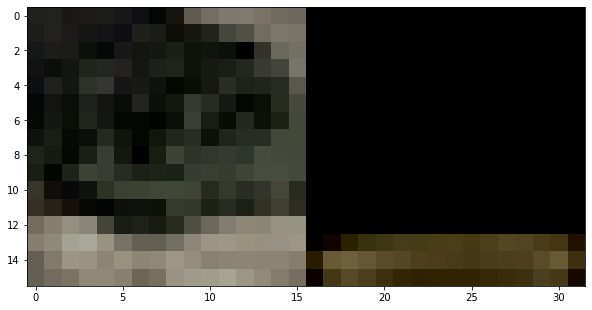

In [21]:
# Visualize on the left the original patch and on the right the reconstructed patch
idx = 34

# Compute the reconstruction
reconstructed_patch = autoencoder(torch.permute(torch.from_numpy(patches[idx]), (2, 0, 1)).unsqueeze(0))
reconstructed_patch = torch.permute(reconstructed_patch[0], (1, 2, 0))

# Plot the 2 patches
display_imgs_side_by_side(patches[idx], reconstructed_patch.detach().numpy())

Interestingly, this seems to have a denoising effect. On such small patches (16x16 pixels) we don't see a meaningfull image but this seems to works reasonably well.

# Feature extraction

Now, we extract the features for all the training patches to later train a SVM model on them.

In [8]:
# Extract the patches features with the trained autoencoder
encoder = Encoder()
weights_path = 'encoder_2021-12-18_15-41-26'
X = extract_features_encoder(encoder, image_dir, weights_path)

Use GPU for features extraction.
Starting features extraction...
Features saved in output/features/features_encoder_2021-12-11_11-58-52.npy


In [ ]:
X.shape

In [10]:
# Load images to get the groundtruths
imgs, gt_imgs = load_images_and_groundtruth(image_dir, gt_dir)
patches, gt_patches = get_imgs_gt_patches(imgs, gt_imgs)

y = build_gt_from_patches(gt_patches, lambda gt_patch: value_to_class(gt_patch, threshold=0.5))

X_train, y_train, X_test, y_test = split_data(X, y, ratio=0.8)

Loaded 100 images
All images have the same size !
Image size = 400, 400


In [13]:
# Standardize the features
X_train, means, stds = standardize_features(X_train)

# Standardize the test data with the same statistics
X_test, _, _ = standardize_features(X_test, means=means, stds=stds)

In [16]:
# Use same hyperparameters as the baseline SVM
svm_rbf = SVC(class_weight='balanced', C=1000, kernel='rbf', cache_size=7000)

In [17]:
# Fit the model
svm_rbf.fit(X_train, y_train)

SVC(cache_size=7000, class_weight='balanced')

In [ ]:
# Compute the predictions for the local test set and compute the scores
y_pred = svm_rbf.predict(X_train)
_, _, _, _ = compute_scores(y_train, y_pred)

In [19]:
y_pred = svm_rbf.predict(X_test)
_, _, _, _ = compute_scores(y_test, y_pred)

Performance on the local test set
	F1-score : 0.4938
	Recall : 0.7695
	Precision : 0.3635
	Accuracy : 0.6933
